# Data Importation and Loading of Datasets

In [ ]:
import pandas as pd

# Load the dataset provided for assessing its structure and content
file_path = 'crime-rate-by-state-2024.csv'
crime_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for comprehending its structure
crime_data.head(), crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   Population2020       51 non-null     int64  
 2   CrimeReported        51 non-null     int64  
 3   CrimeRate            51 non-null     float64
 4   CrimeViolent         51 non-null     int64  
 5   CrimeViolentRate     51 non-null     float64
 6   CrimeNonViolent      51 non-null     int64  
 7   CrimeNonViolentRate  51 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB


(        state  Population2020  CrimeReported  CrimeRate  CrimeViolent  \
 0     Alabama         4921532          26596   4727.065         22322   
 1      Alaska          731158          10647   5358.896          6126   
 2     Arizona         7421401          40435   4940.118         35980   
 3    Arkansas         3030522          25590   5898.753         20363   
 4  California        39368078         178304   4719.900        174026   
 
    CrimeViolentRate  CrimeNonViolent  CrimeNonViolentRate  
 0           453.558           210322             4273.507  
 1           837.849            33056             4521.047  
 2           484.814           330646             4455.304  
 3           671.930           158400             5226.822  
 4           442.049          1684108             4277.852  ,
 None)

# Basic Statistical Analysis

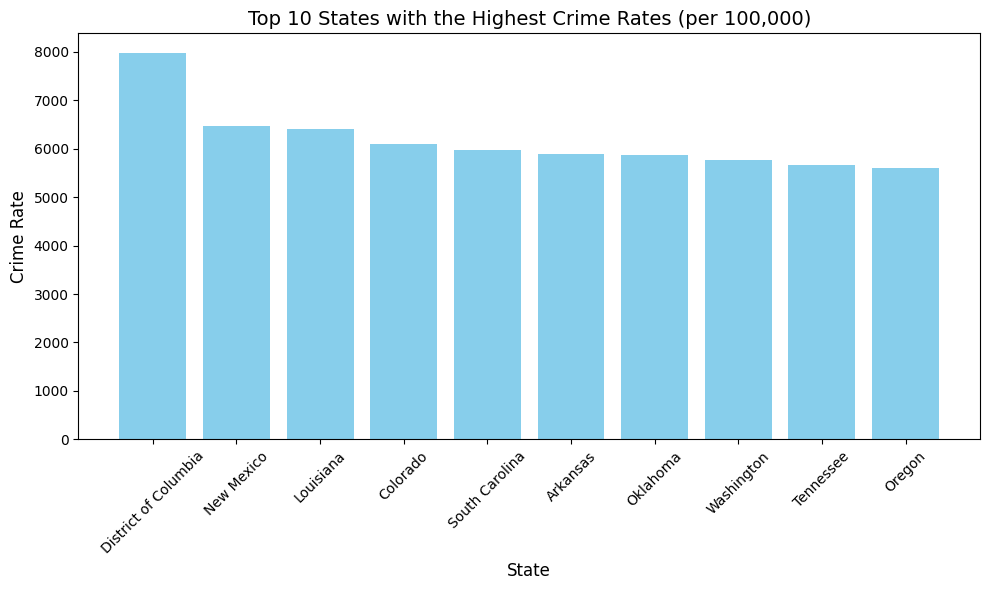

,Population2020,CrimeReported,CrimeRate,CrimeViolent,CrimeViolentRate,CrimeNonViolent,CrimeNonViolentRate
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000
mean,6.460473e+06,29710.882353,4359.827686,25747.156863,396.104235,2.530211e+05,3963.723333
std,7.375082e+06,32100.698106,1254.411033,31998.774225,175.905121,3.032738e+05,1128.108663
min,5.823280e+05,3515.000000,2344.184000,1081.000000,108.581000,1.517200e+04,2106.367000
25%,1.805850e+06,9940.000000,3383.593500,6405.500000,284.318500,5.890400e+04,3124.457000
50%,4.477251e+06,20838.000000,4414.802000,17353.000000,383.595000,1.733080e+05,3922.745000
75%,7.557506e+06,36960.000000,5133.198000,31544.500000,459.432500,3.202800e+05,4671.885000
max,3.936808e+07,178304.000000,7985.932000,174026.000000,999.837000,1.684108e+06,6986.095000


In [ ]:
import matplotlib.pyplot as plt

# Basic statistical analysis
crime_stats = crime_data.describe()

# Visualization depicting Top 10 states with the highest crime rates
top_crime_states = crime_data.nlargest(10, 'CrimeRate')

plt.figure(figsize=(10, 6))
plt.bar(top_crime_states['state'], top_crime_states['CrimeRate'], color='skyblue')
plt.title('Top 10 States with the Highest Crime Rates (per 100,000)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Crime Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying all the summary statistics for review
crime_stats

# Model building and Data Manipulation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting relevant features and target variables for developing the model
features = crime_data[['Population2020', 'CrimeReported', 'CrimeViolent', 'CrimeNonViolent']]
targets = crime_data[['CrimeRate', 'CrimeViolentRate', 'CrimeNonViolentRate']]

# Normalizing the feature set
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, random_state=42)

# Basic summary of the dataset after normalization and splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 4), (11, 4), (40, 3), (11, 3))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialization and training of the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction on the test set
y_pred = model.predict(X_test)

# Evaluation of the model's performance
r2 = r2_score(y_test, y_pred)

r2

0.9353270269896475

# Relevant Data Visualizations

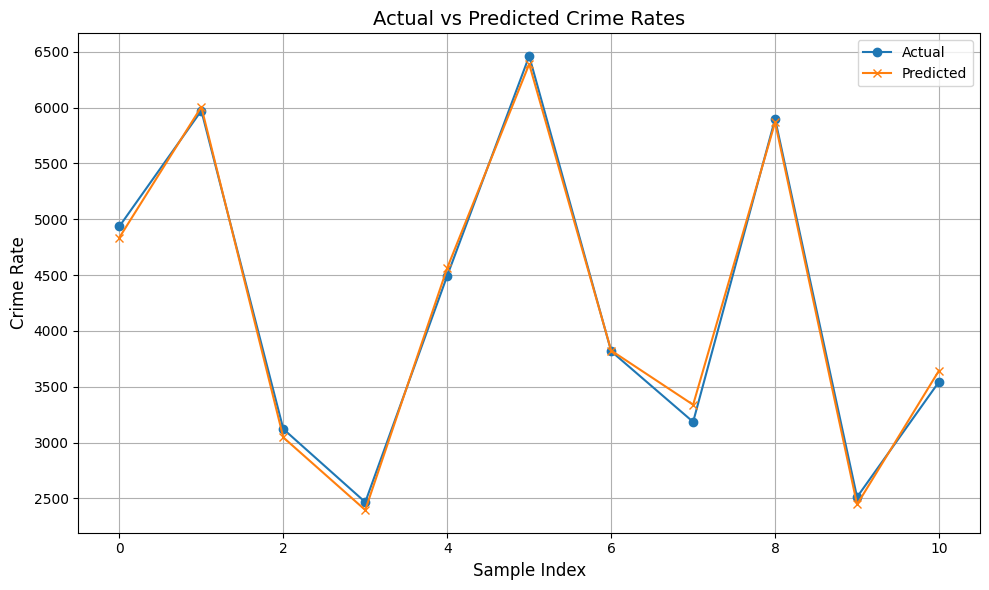

In [ ]:
# Visualization of actual vs. predicted values for the most relevant target variable: CrimeRate
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test['CrimeRate'], label='Actual', marker='o')
plt.plot(range(len(y_test)), y_pred[:, 0], label='Predicted', marker='x')
plt.title('Actual vs Predicted Crime Rates', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Crime Rate', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

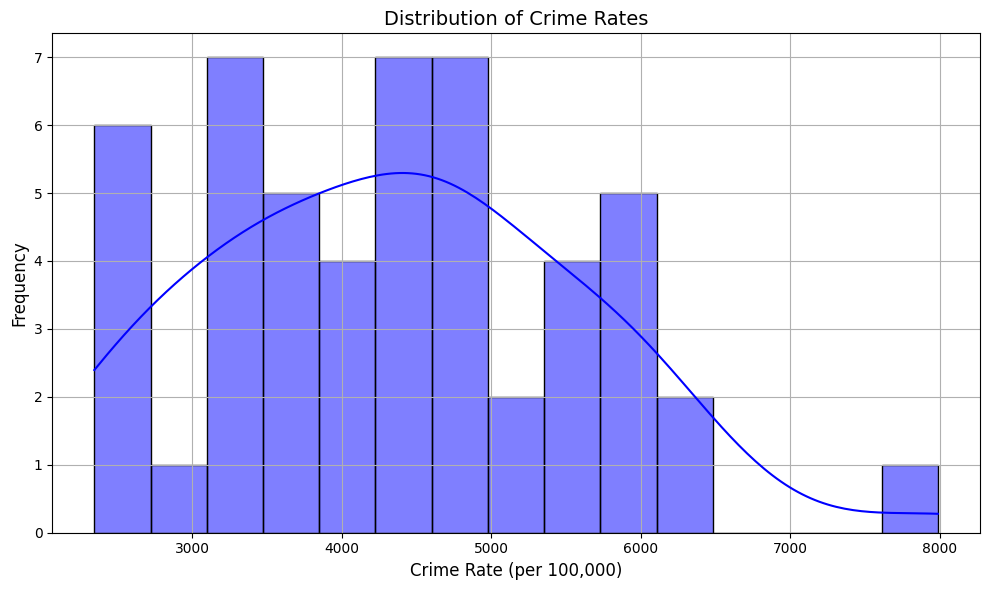

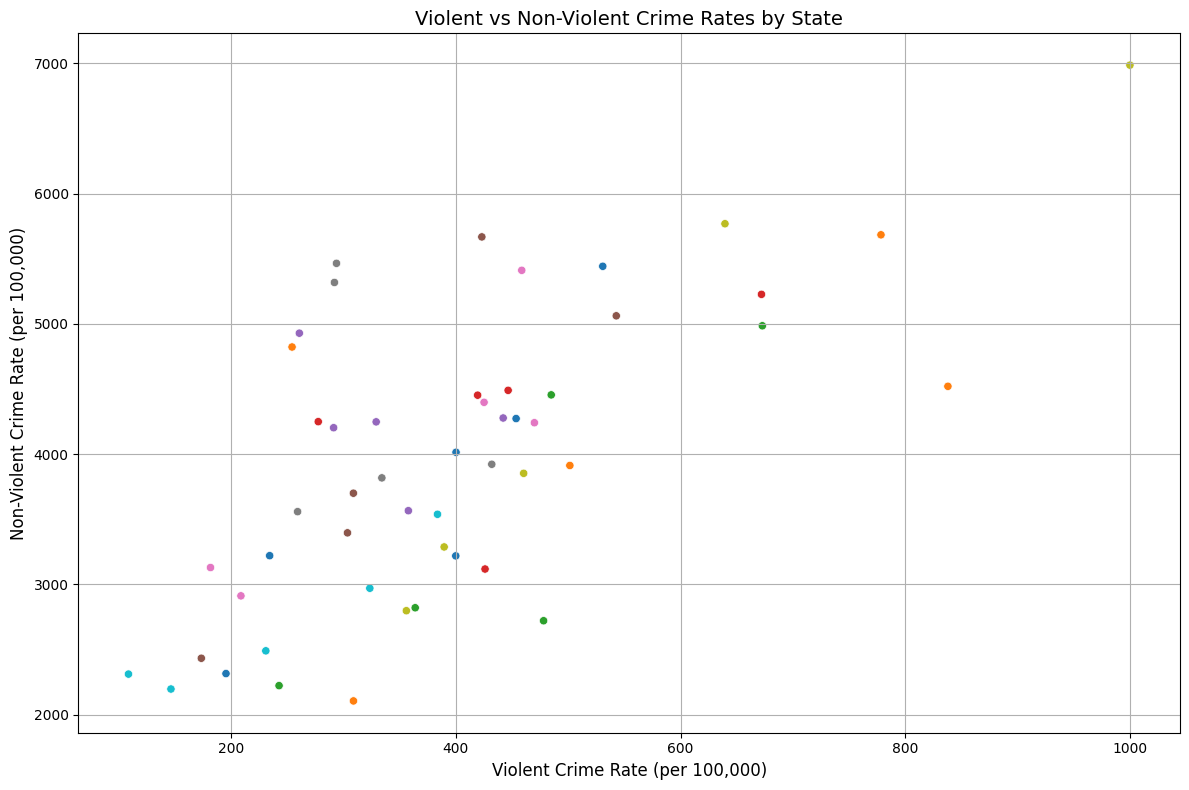

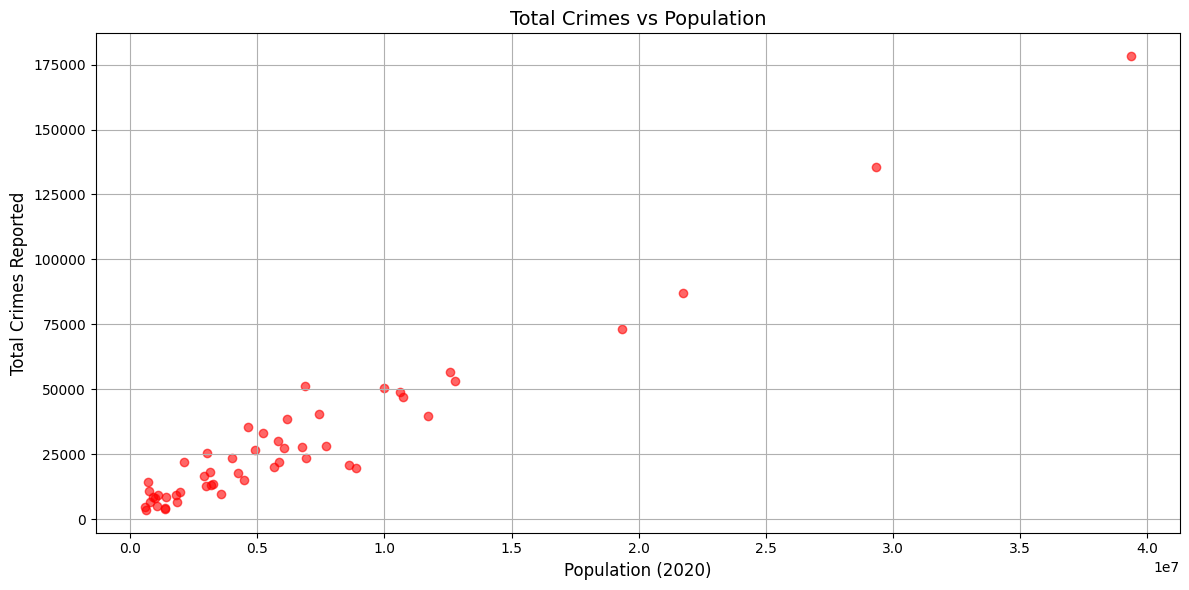

In [ ]:
# Graph 1: Crime Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(crime_data['CrimeRate'], bins=15, kde=True, color='blue')
plt.title('Distribution of Crime Rates', fontsize=14)
plt.xlabel('Crime Rate (per 100,000)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2: Violent vs Non-Violent Crime Rates by State
plt.figure(figsize=(12, 8))
sns.scatterplot(data=crime_data, x='CrimeViolentRate', y='CrimeNonViolentRate', hue='state', palette='tab10', legend=False)
plt.title('Violent vs Non-Violent Crime Rates by State', fontsize=14)
plt.xlabel('Violent Crime Rate (per 100,000)', fontsize=12)
plt.ylabel('Non-Violent Crime Rate (per 100,000)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 3: Total Crimes by Population
plt.figure(figsize=(12, 6))
plt.scatter(crime_data['Population2020'], crime_data['CrimeReported'], color='red', alpha=0.6)
plt.title('Total Crimes vs Population', fontsize=14)
plt.xlabel('Population (2020)', fontsize=12)
plt.ylabel('Total Crimes Reported', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()